<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [26]:
import os
print(os.getcwd())  # Check current working directory
print(os.path.exists("../data/Wholesale_customers_data.csv"))  # Check if file exists


df = pd.read_csv("/Users/karl-oskar.janzon/Documents/Ironhack/Course/Git/lab-unsupervised-learning-en/data/Wholesale_customers_data.csv")
df.head()


/Users/karl-oskar.janzon/Documents/Ironhack/Course/Git/lab-unsupervised-learning-en/your-code
True


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


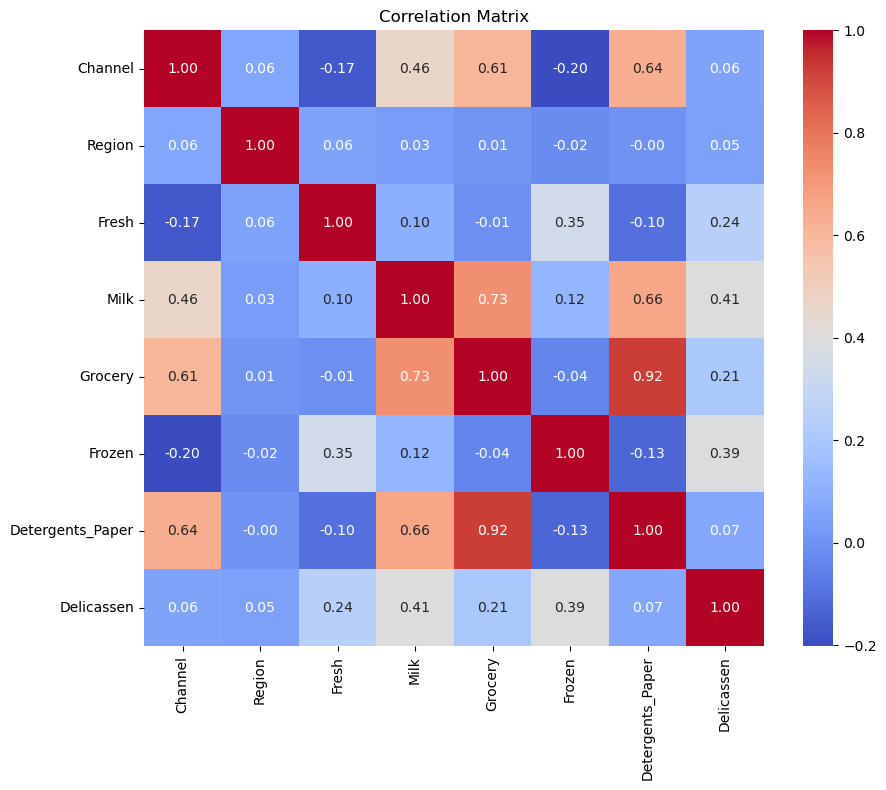

In [29]:
# Check for missing values
missing_values = df.isnull().sum()

# Display only columns with missing values
print(missing_values)


# Compute correlation matrix
correlation_matrix = df.corr()

# Display it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Your observations here**

no missing data

detergents_paper and Grocery have a high correlation- ...

No immediate need to drop highly correlated columns.
In clustering, collinearity does not cause the same issues as in regression.

no need to remove outliers beforehand, can try as is first 




# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

**Your comment here**

No missing data removal.
No need to drop correlated columns unless clustering is heavily affected.
Do NOT remove outliers initially—DBSCAN naturally handles them, and StandardScaler mitigates their effect. 
No need for log transformation—StandardScaler will standardize the data.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [30]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data (excluding categorical columns if any)
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the first few rows
print(df_scaled.head())


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Initialize K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Replace 3 with the optimal k from the elbow method

# Fit K-Means to the scaled data
kmeans.fit(df_scaled)

# Assign cluster labels to the original dataset
df["labels"] = kmeans.labels_

# Display the first few rows with cluster assignments
print(df.head())

# Count records in each cluster
print(df["labels"].value_counts())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       1  
4        5185       0  
labels
1    297
0    130
2     13
Name: count, dtype: int64


### Looking to the elbow we can choose 2 like the correct number of clusters

In [ ]:
kmeans_2 = KMeans(n_clusters=2).fit(df_scaled)

labels = kmeans_2.predict(df_scaled)

df["labels"] = kmeans_2.labels_

# Display the first few rows with cluster assignments
print(df.head())

# Count the number of records in each cluster
print(df["labels"].value_counts())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       1  
1        1776       1  
2        7844       1  
3        1788       0  
4        5185       1  
labels
0    302
1    138
Name: count, dtype: int64


In [34]:
#3clean_customers['Label'] = clusters

Count the values in `labels`.

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [38]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with eps=0.5
dbscan = DBSCAN(eps=0.5)

# Fit DBSCAN to the scaled data
dbscan.fit(df_scaled)

# Assign DBSCAN cluster labels to the original dataset
df["labels_DBSCAN"] = dbscan.labels_

# Display the first few rows with both K-Means and DBSCAN labels
print(df.head())

# Count the number of records in each DBSCAN cluster
print(df["labels_DBSCAN"].value_counts())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  labels_DBSCAN  
0        1338       1             -1  
1        1776       1             -1  
2        7844       1             -1  
3        1788       0              1  
4        5185       1             -1  
labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


Count the values in `labels_DBSCAN`.

In [26]:
# Your code here


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [44]:
def plot(x,y,hue, title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(title)
    return plt.show();

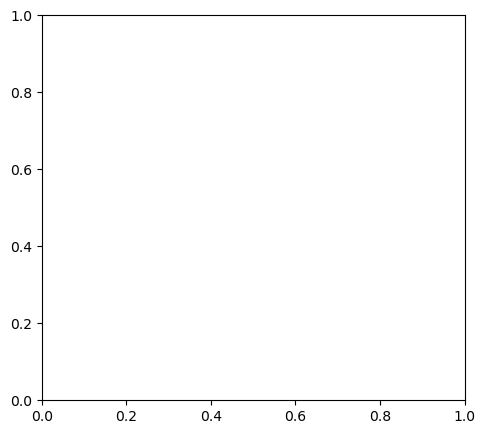

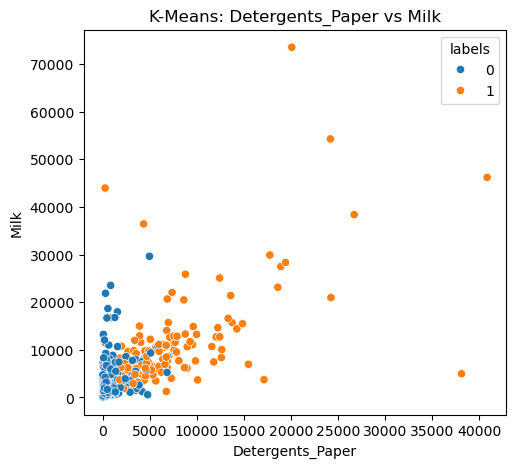

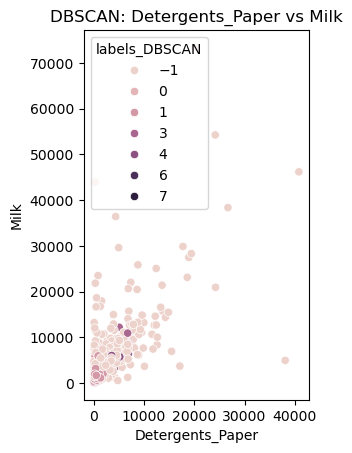

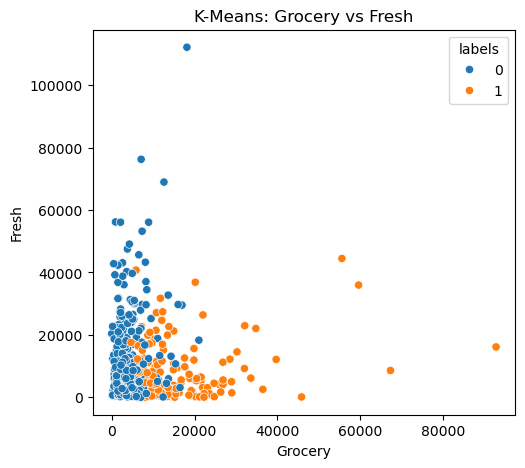

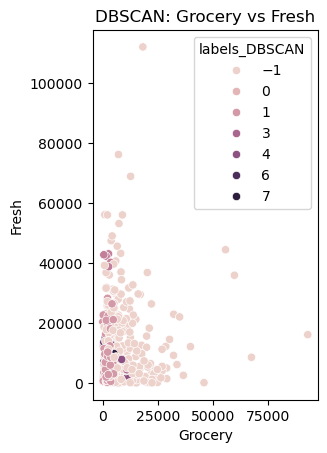

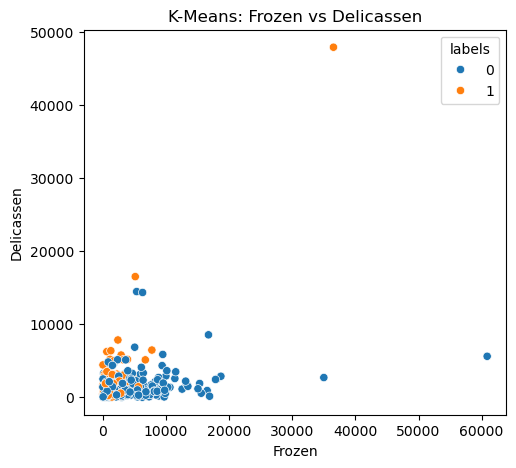

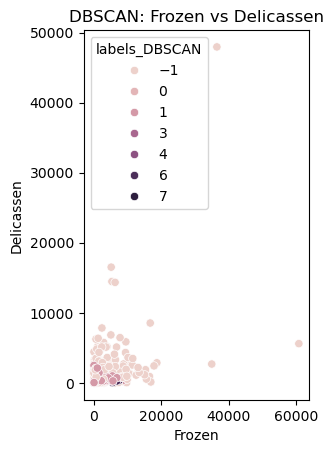

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 1️⃣ Detergents_Paper vs. Milk - K-Means
plt.subplot(1, 2, 1)
plot(df["Detergents_Paper"], df["Milk"], df["labels"], "K-Means: Detergents_Paper vs Milk")

# 2️⃣ Detergents_Paper vs. Milk - DBSCAN
plt.subplot(1, 2, 2)
plot(df["Detergents_Paper"], df["Milk"], df["labels_DBSCAN"], "DBSCAN: Detergents_Paper vs Milk")

plt.figure(figsize=(12, 5))

# 3️⃣ Grocery vs. Fresh - K-Means
plt.subplot(1, 2, 1)
plot(df["Grocery"], df["Fresh"], df["labels"], "K-Means: Grocery vs Fresh")

# 4️⃣ Grocery vs. Fresh - DBSCAN
plt.subplot(1, 2, 2)
plot(df["Grocery"], df["Fresh"], df["labels_DBSCAN"], "DBSCAN: Grocery vs Fresh")

plt.figure(figsize=(12, 5))

# 5️⃣ Frozen vs. Delicassen - K-Means
plt.subplot(1, 2, 1)
plot(df["Frozen"], df["Delicassen"], df["labels"], "K-Means: Frozen vs Delicassen")

# 6️⃣ Frozen vs. Delicassen - DBSCAN
plt.subplot(1, 2, 2)
plot(df["Frozen"], df["Delicassen"], df["labels_DBSCAN"], "DBSCAN: Frozen vs Delicassen")


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [46]:
# Compute mean values for each K-Means cluster
kmeans_means = df.groupby("labels").mean()

# Compute mean values for each DBSCAN cluster
dbscan_means = df.groupby("labels_DBSCAN").mean()

# Display the results
print("K-Means Cluster Means:")
print(kmeans_means)

print("\nDBSCAN Cluster Means:")
print(dbscan_means)


K-Means Cluster Means:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.016556  2.500000  13451.589404   3308.529801   3919.364238   
1       1.992754  2.637681   8824.282609  11240.442029  16774.739130   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       3671.261589        789.718543  1270.619205       0.619205  
1       1760.355072       7459.144928  2081.275362      -0.565217  

DBSCAN Cluster Means:
                Channel   Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0             2.000000  3.00000  11401.000000   3536.200000   6729.000000   
 1             1.000000  3.00000   9128.823077   1862.438462   2423.530769   
 2 

Which algorithm appears to perform better?

**Your observations here**

K-Mean:

Cluster 0 contains customers with higher Fresh and Frozen spending but lower spending on Milk, Grocery, and Detergents_Paper.
Cluster 1 has customers with much higher Milk, Grocery, and Detergents_Paper spending but lower Fresh and Frozen spending.
Interpretation: K-Means has grouped customers based on their purchasing preferences, separating high grocery/milk buyers from fresh/frozen buyers.

🔹 What This Means for DBSCAN

Cluster -1 (Noise/Outliers) contains customers that don’t fit neatly into any dense region.
Cluster 0 & 1:
Cluster 0 customers buy more Frozen items.
Cluster 1 customers have lower Milk, Grocery, and Detergents_Paper purchases.
Cluster 2: These customers have extremely high Fresh spending (~41,000) but very low in other categories.
Cluster 3: Customers with high Milk and Grocery spending but low Fresh & Frozen.

DBSCAN identified more nuanced groups, detecting outliers (Cluster -1) and segmenting customers based on density rather than forcing them into just two clusters (as K-Means did).



# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 